In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
# from small_script.myFunctions import *



%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
plt.rcParams['figure.figsize'] = [16.18033, 10]

dataset = {"old":"1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "),
            "new":"1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "),
            "test":["t089", "t120", "t251", "top7", "1ubq", "t0766", "t0778", "t0782", "t0792", "t0803", "t0815", "t0833", "t0842", "t0844"]}
dataset["combined"] = dataset["old"] + dataset["new"]

# pdb_list, steps = dataset["old"]

def get_data(pre, pdb_list, simType="all_simulations", n_rum=30, rerun=1, formatName=True):
    # to get last 20 frame of each run
    _all = []
    for p in pdb_list:
        if formatName:
            name = p.lower()[:4]
        else:
            name = p
        for i in range(n_rum):
            for ii in range(rerun):
                location = pre + f"{simType}/{name}/simulation/{i}/{ii}/wham.dat"
                try:
                    tmp = pd.read_csv(location).tail(50).reset_index()
                    tmp.columns = tmp.columns.str.strip()
                    _all.append(tmp.assign(Run=i, Name=name, Rerun=ii))
                except Exception as e: 
                    print(e)
    data = pd.concat(_all)
    data["Run"] = "Run" + data["Run"].astype(str)
    return data

# pre = "/Users/weilu/Research/server/feb_2019/optimization_iter1/database/2gb1/"
# fileName = "movie.pdb"
def splitPDB(pre, fileName):
    location = f"{pre}/{fileName}"
    with open(location, "r") as f:
        a = f.readlines()
    i = 0
    tmp = ""
    for line in a:
        tmp += line
    #     os.system(f"echo '{line}' >> {pre}frame{i}")
        if line == "END\n":
            with open(f"{pre}frame{i}.pdb", "w") as out:
                out.write(tmp)
            i += 1
            tmp = ""


import subprocess
def getFromTerminal(CMD):
    return subprocess.Popen(CMD,stdout=subprocess.PIPE,shell=True).communicate()[0].decode()
def getSize(p):
    protein = p.lower()[:4]
    pre = f"/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/all_simulations/{protein}/{protein}/ssweight"
    a = getFromTerminal(f"wc {pre}")
#     print(a)
    n = int(a.split()[0])
    return n


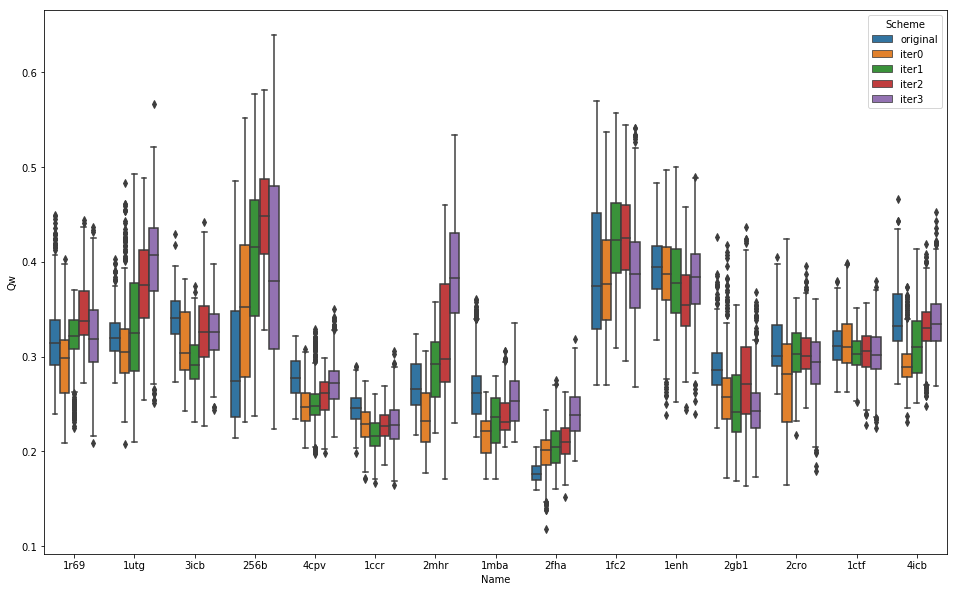

In [74]:
data_origin = pd.read_csv("/Users/weilu/Research/data/optimization/original_iterative_optimization_combined_train_set_04-01.csv", index_col=0)

data = pd.read_csv("/Users/weilu/Research/data/optimization/iter0_normalized_noFrag_iterative_optimization_combined_train_set_03-31.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_normalized_noFrag_iterative_optimization_combined_train_set_03-31.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_normalized_noFrag_iterative_optimization_combined_train_set_04-01.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_normalized_noFrag_iterative_optimization_combined_train_set_04-03.csv", index_col=0)
data5 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_normalized_noFrag_90_iterative_optimization_combined_train_set_04-03.csv", index_col=0)

d = pd.concat([
                data_origin.query("Rerun == 1").assign(Scheme="original"), 
                data.query("Rerun == 1").assign(Scheme="iter0"),         
                 data2.query("Rerun == 1").assign(Scheme="iter1"), 
                data3.query("Rerun == 1").assign(Scheme="iter2"), 
                data4.query("Rerun == 1").assign(Scheme="iter3"), 
#                 data5.query("Rerun == 1").assign(Scheme="iter3_90"), 
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)
# sns.boxplot("Qw", "Name", hue="Scheme", data=d)


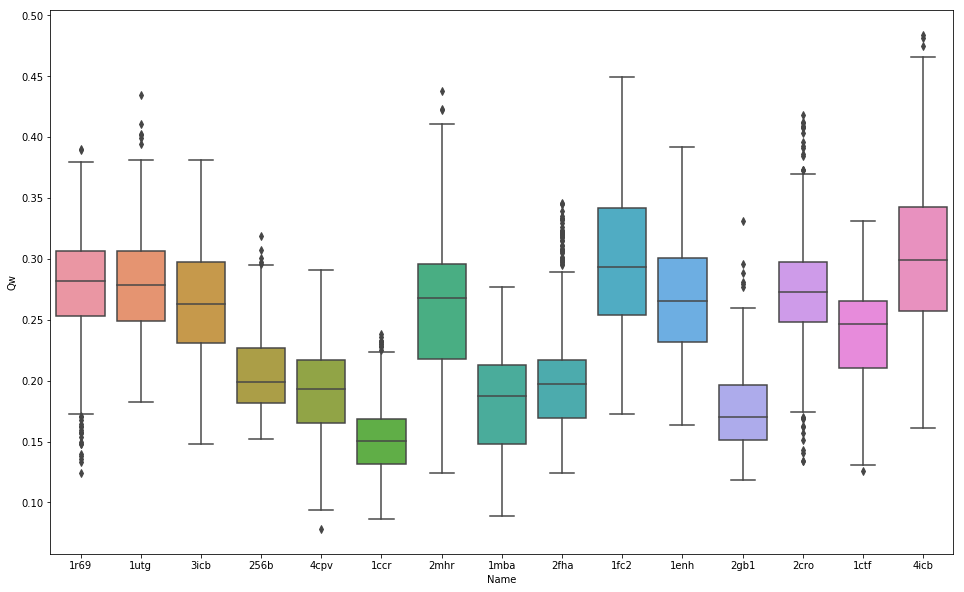

In [70]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set"
pre = pre + folder + "/"
simulationType = "iter3_normalized_noFrag_90"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=2, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data.query("Rerun == 1"))

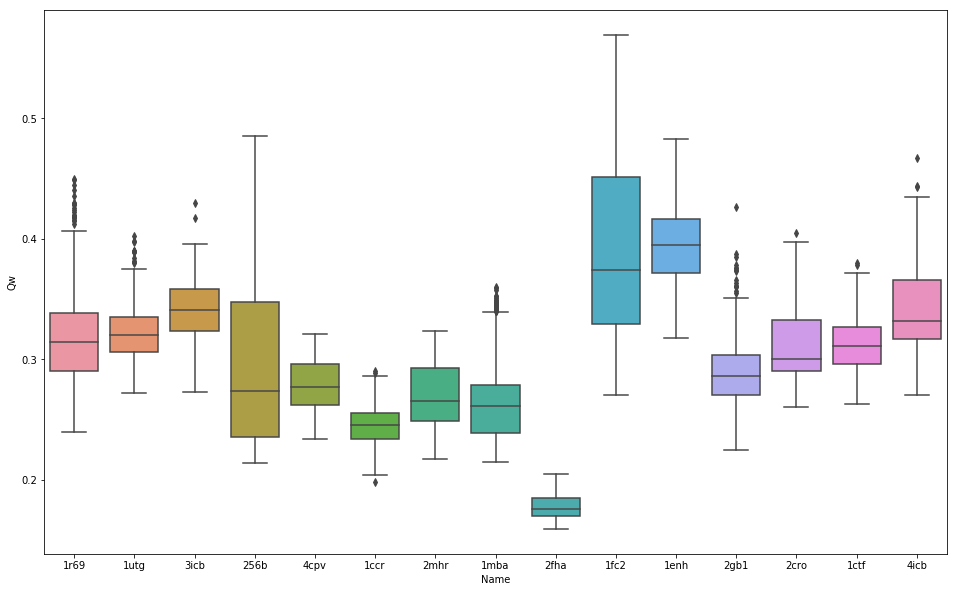

In [16]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set"
pre = pre + folder + "/"
simulationType = "original"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=2, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data.query("Rerun == 1"))

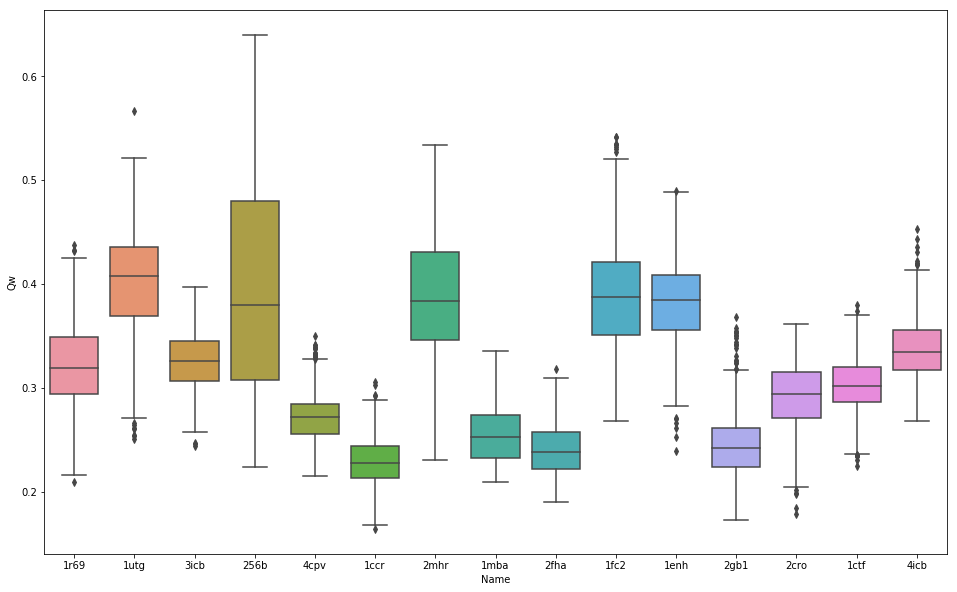

In [71]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set"
pre = pre + folder + "/"
simulationType = "iter3_normalized_noFrag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=2, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data.query("Rerun == 1"))

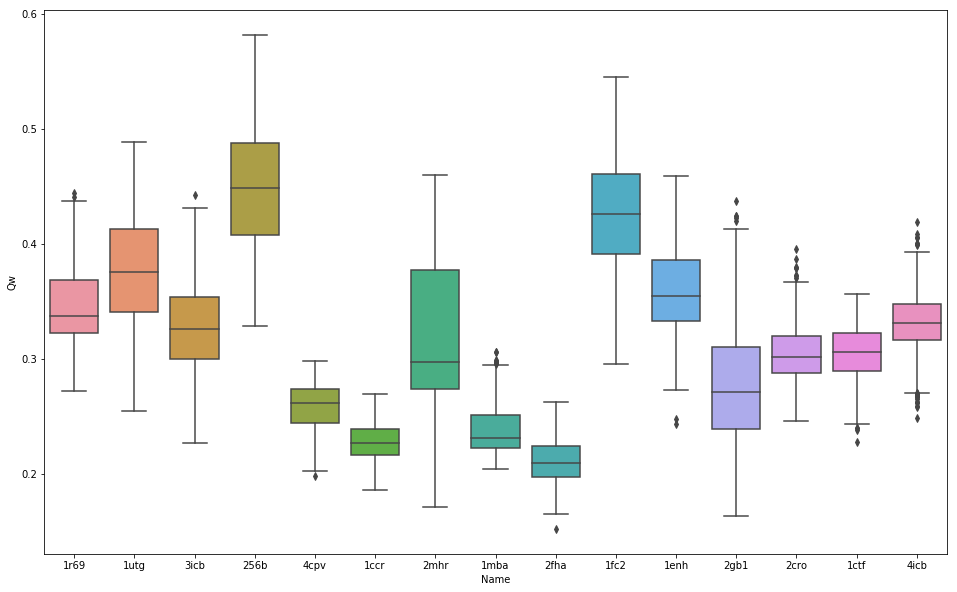

In [57]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set"
pre = pre + folder + "/"
simulationType = "iter2_normalized_noFrag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=2, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data.query("Rerun == 1"))

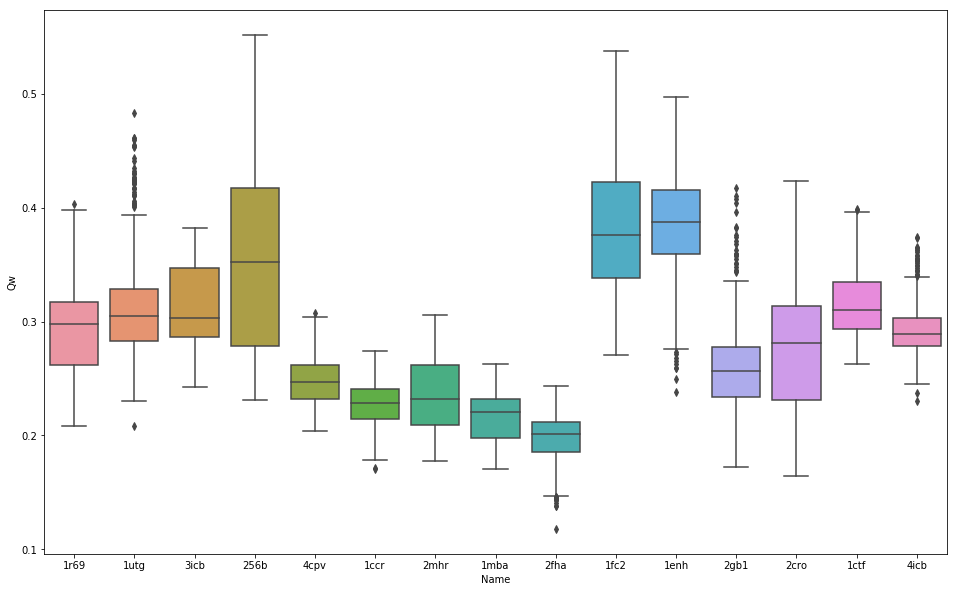

In [13]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set"
pre = pre + folder + "/"
simulationType = "iter0_normalized_noFrag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=2, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data.query("Rerun == 1"))

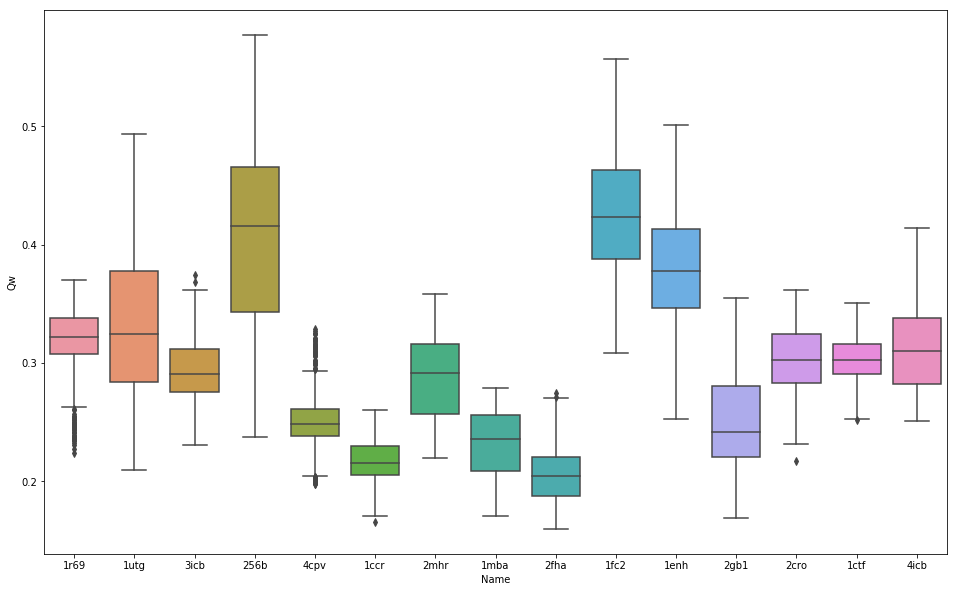

In [14]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set"
pre = pre + folder + "/"
simulationType = "iter1_normalized_noFrag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=2, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data.query("Rerun == 1"))

In [10]:
data.head()

,index,Steps,Qw,Rg,Tc,Energy,Run,Name,Rerun
0,950,3804000,0.111828,22.666299,23,27.342100,Run0,1r69,0
1,951,3808000,0.087000,23.804092,17,11.928062,Run0,1r69,0
2,952,3812000,0.053962,24.655929,14,45.089979,Run0,1r69,0
3,953,3816000,0.088343,24.288471,21,63.482033,Run0,1r69,0
4,954,3820000,0.118645,24.264631,24,50.847944,Run0,1r69,0


In [11]:
data.tail()

,index,Steps,Qw,Rg,Tc,Energy,Run,Name,Rerun
45,1995,15984000,0.294303,12.372903,105,-230.151421,Run9,4icb,1
46,1996,15988000,0.290072,12.530187,100,-248.805133,Run9,4icb,1
47,1997,15992000,0.282667,13.151885,90,-237.669696,Run9,4icb,1
48,1998,15996000,0.279217,12.576629,95,-248.688889,Run9,4icb,1
49,1999,16000000,0.294767,12.072510,97,-250.027118,Run9,4icb,1


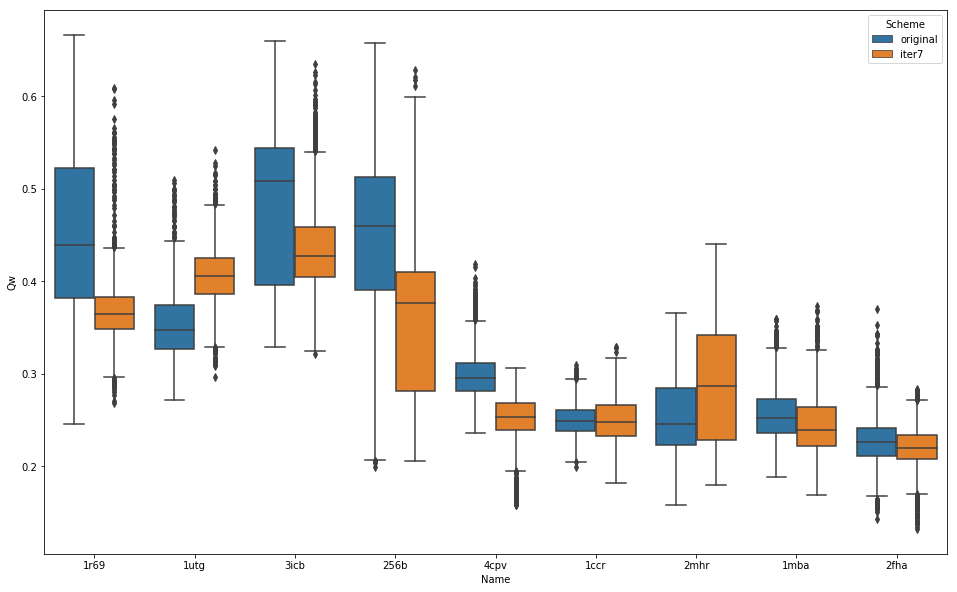

In [18]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_iterative_optimization_old_set_with_frag_03-28.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/iter7_2_iterative_optimization_old_set_with_frag_03-28.csv", index_col=0)

d = pd.concat([
                data.assign(Scheme="original"), 
                 data2.assign(Scheme="iter7"), 

              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)

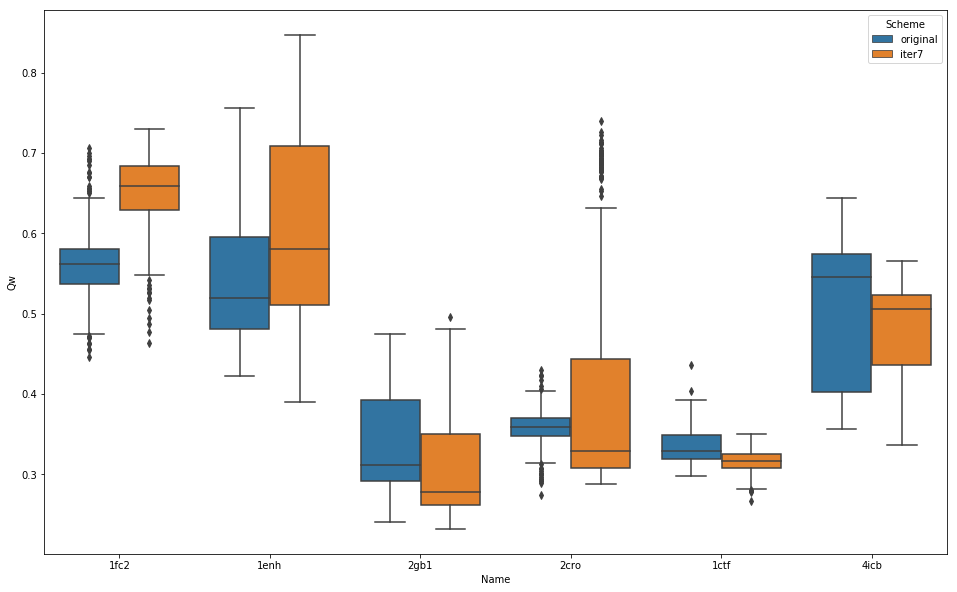

In [66]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_iterative_optimization_new_set_with_frag_04-02.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/iter7_2_iterative_optimization_new_set_with_frag_04-01.csv", index_col=0)

d = pd.concat([
                data.assign(Scheme="original"), 
                 data2.assign(Scheme="iter7"), 

              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)

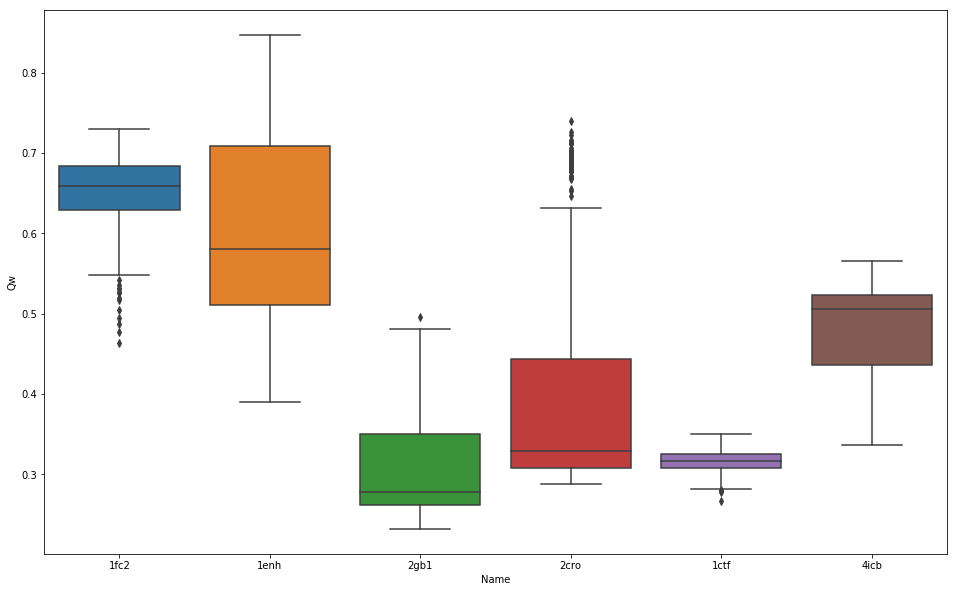

In [61]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_new_set_with_frag"
pre = pre + folder + "/"
simulationType = "iter7_2"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["new"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

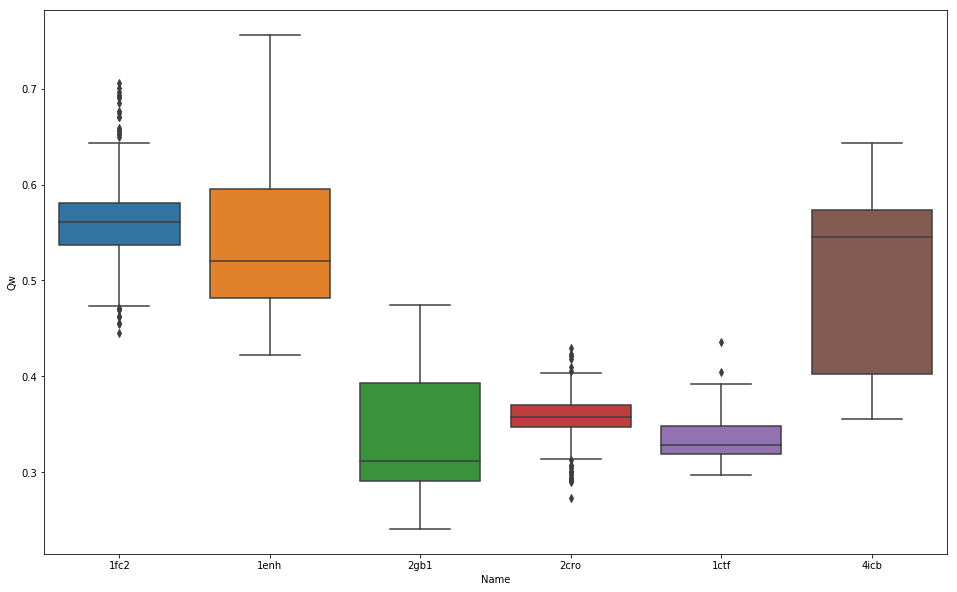

In [65]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_new_set_with_frag"
pre = pre + folder + "/"
simulationType = "single"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["new"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

In [53]:
location = "/Users/weilu/Research/server/april_2019/iterative_optimization_new_set_with_frag/all_simulations/1fc2/1fc2"
# def relocate(location):
#     fileLocation = location + "/frags.mem"
#     pre = location + "/../"
#     os.system(f"mkdir -p {pre}/fraglib")
#     with open(fileLocation) as f:
#         next(f)
#         next(f)
#         next(f)
#         next(f)
#         for line in f:
#             out = os.system(f"cp {line.split()[0]} {pre}/fraglib/")
#             if out != 0:
#                 print(f"!!Problem!!, {line.split()[0]}")

def relocate(location):
    fileLocation = location + "/frags.mem"
    pre = location + "/../"
    os.system(f"mkdir -p {pre}/fraglib")
    a = pd.read_csv(fileLocation, skiprows=4, sep=" ", names=["location", "i", "j", "sep", "w"])
    b = a["location"].unique()
    for l in b:
        out = os.system(f"cp {l} {pre}/fraglib/")
        if out != 0:
            print(f"!!Problem!!, {line.split()[0]}")

             
relocate(location)





In [64]:
a = ["a", "b"]
print(f"{a}")

['a', 'b']
